In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


<Figure size 1152x1296 with 0 Axes>

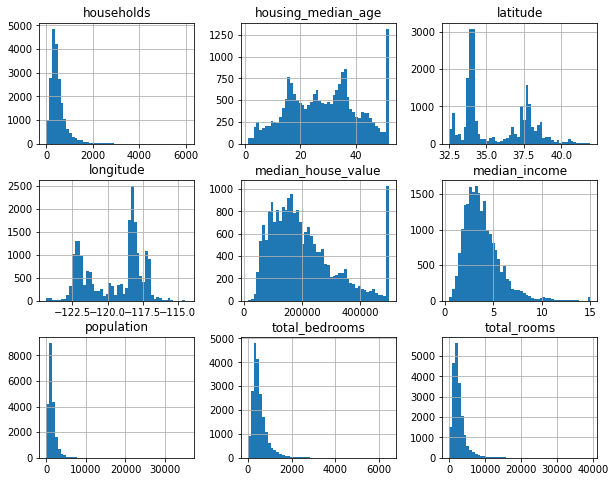

In [4]:
plt.figure(figsize =(16,18))
data.hist(bins = 50, figsize =(10,8))
plt.show()

In [5]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
encoded_df = pd.get_dummies(data = data, columns=['ocean_proximity'])
encoded_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [7]:
encoded_df['income_cat'] = pd.cut(encoded_df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [8]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0,3


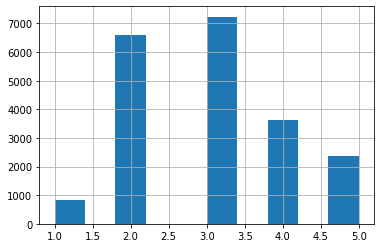

In [9]:
encoded_df['income_cat'].hist()
plt.show()

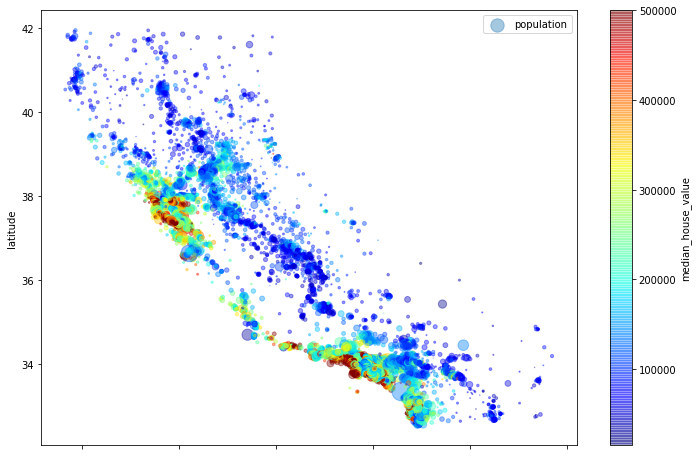

In [10]:
encoded_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=data['population']/100, label='population',
figsize=(12, 8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [11]:
corr_matrix = encoded_df.corr()
print(corr_matrix.median_house_value.sort_values(ascending=False))

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


In [12]:
encoded_df["rooms_per_household"] = encoded_df["total_rooms"]/encoded_df["households"]
encoded_df["bedrooms_per_room"] = encoded_df["total_bedrooms"]/encoded_df["total_rooms"]
encoded_df["population_per_household"] = encoded_df["population"]/encoded_df["households"]

corr_matrix = encoded_df.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population_per_household     -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.255880
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


In [13]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   20640 non-null  float64 
 1   latitude                    20640 non-null  float64 
 2   housing_median_age          20640 non-null  int64   
 3   total_rooms                 20640 non-null  int64   
 4   total_bedrooms              20433 non-null  float64 
 5   population                  20640 non-null  int64   
 6   households                  20640 non-null  int64   
 7   median_income               20640 non-null  float64 
 8   median_house_value          20640 non-null  int64   
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8   
 10  ocean_proximity_INLAND      20640 non-null  uint8   
 11  ocean_proximity_ISLAND      20640 non-null  uint8   
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8   
 13  ocean_proximity_

In [14]:
encoded_df.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
income_cat                      0
rooms_per_household             0
bedrooms_per_room             207
population_per_household        0
dtype: int64

In [15]:
median = encoded_df["total_bedrooms"].median()
encoded_df["total_bedrooms"].fillna(median, inplace=True)

In [16]:
median = encoded_df["bedrooms_per_room"].median()
encoded_df["bedrooms_per_room"].fillna(median, inplace=True)

In [17]:
encoded_df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
income_cat                    0
rooms_per_household           0
bedrooms_per_room             0
population_per_household      0
dtype: int64

In [20]:
encoded_df.dtypes

longitude                      float64
latitude                       float64
housing_median_age               int64
total_rooms                      int64
total_bedrooms                 float64
population                       int64
households                       int64
median_income                  float64
median_house_value               int64
ocean_proximity_<1H OCEAN        uint8
ocean_proximity_INLAND           uint8
ocean_proximity_ISLAND           uint8
ocean_proximity_NEAR BAY         uint8
ocean_proximity_NEAR OCEAN       uint8
income_cat                    category
rooms_per_household            float64
bedrooms_per_room              float64
population_per_household       float64
dtype: object

In [24]:
encoded_df = encoded_df.drop(['income_cat'], axis =1)

In [25]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0,6.281853,0.172096,2.181467


In [33]:
y = encoded_df['median_house_value']
X = encoded_df.drop(columns= ['median_house_value'])

In [34]:
X.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0,6.984127,0.146591,2.555556


In [35]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=323)

In [37]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
17375,-120.42,34.96,31,3518,608.0,1386,572,3.6212,1,0,0,0,0,6.150350,0.172825,2.423077
1195,-121.65,39.35,24,1003,251.0,1098,227,1.7552,0,1,0,0,0,4.418502,0.250249,4.837004
1745,-122.35,37.95,31,2449,595.0,1801,548,2.6328,0,0,0,1,0,4.468978,0.242956,3.286496
19587,-120.80,37.61,30,918,154.0,469,139,3.9688,0,1,0,0,0,6.604317,0.167756,3.374101
91,-122.28,37.80,52,215,87.0,904,88,0.8668,0,0,0,1,0,2.443182,0.404651,10.272727


In [38]:
y_train.head()

17375    151400
1195      86400
1745     110300
19587    175000
91       137500
Name: median_house_value, dtype: int64

In [76]:
y_test

8862     500001
7487     131900
19346    168800
6535     162200
18237    266400
          ...  
4616     237500
5554     303300
6436     212200
1815     177800
9510     144000
Name: median_house_value, Length: 5160, dtype: int64

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
y_pred

array([409671.66,  97396.37, 217452.45, ..., 196417.23, 270763.88,
       224016.31])

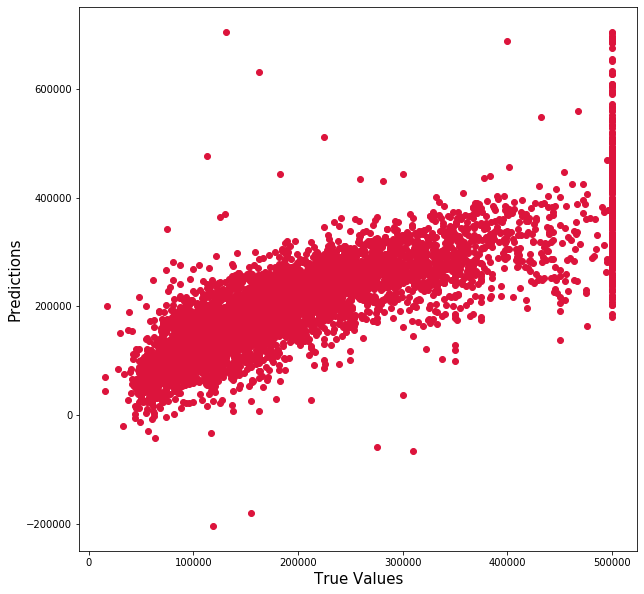

In [81]:
plt.figure(figsize = (10, 10))
plt.scatter(y_test, y_pred, c = 'crimson')

plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)

plt.show()